<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Открытие-и-прочтение-данных" data-toc-modified-id="Открытие-и-прочтение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Открытие и прочтение данных</a></span></li><li><span><a href="#Проверка-эффективности-обогащения" data-toc-modified-id="Проверка-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка эффективности обогащения</a></span></li><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-концентрации-металлов-Au,-Ag,-Pb-на-различных-этапах-очистки" data-toc-modified-id="Изменение-концентрации-металлов-Au,-Ag,-Pb-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение концентрации металлов Au, Ag, Pb на различных этапах очистки</a></span></li><li><span><a href="#Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях" data-toc-modified-id="Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации всех веществ на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-sMAPE" data-toc-modified-id="Функция-для-вычисления-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления sMAPE</a></span></li><li><span><a href="#Подготовка-выборок-для-моделей" data-toc-modified-id="Подготовка-выборок-для-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подготовка выборок для моделей</a></span></li><li><span><a href="#Модель-предсказания-эффективности-обогащения-чернового-концентрата" data-toc-modified-id="Модель-предсказания-эффективности-обогащения-чернового-концентрата-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель предсказания эффективности обогащения чернового концентрата</a></span></li><li><span><a href="#Модель-предсказания-эффективности-обогащения-финального-концентрата" data-toc-modified-id="Модель-предсказания-эффективности-обогащения-финального-концентрата-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Модель предсказания эффективности обогащения финального концентрата</a></span></li><li><span><a href="#Подсчет-итогового-sMAPE" data-toc-modified-id="Подсчет-итогового-sMAPE-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Подсчет итогового sMAPE</a></span></li></ul></li><li><span><a href="#Общий-вывод:" data-toc-modified-id="Общий-вывод:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод:</a></span></li></ul></div>

# Восстановление золота из руды

Подготовим прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используем данные с параметрами добычи и очистки. Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

*План действий:*

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

## Подготовка данных

Для начала работы импортируем все нужные библиотеки и функции.

In [1]:
!pip install -U scikit-learn
!pip3 install catboost
!pip install lightgbm

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

Requirement already up-to-date: scikit-learn in c:\users\user\anaconda3\lib\site-packages (1.0.1)


### Открытие и прочтение данных

In [2]:
#тренировочная выборка
train_df = pd.read_csv('gold_recovery_train_new.csv')

train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [3]:
#тестовая выборка
test_df = pd.read_csv('gold_recovery_test_new.csv')
test_df.info()
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [4]:
#полный датасет
full_df = pd.read_csv('gold_recovery_full_new.csv')
full_df.info()
full_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Входные данные представляют собой 3 таблицы:
- train_df - обучащая выборка;
- test_df - тестовая выборка;
- full_df - полные данные, по сути объединение train и test.

Каждая строка представляет собой наблюдение по смеси руды, описываемое различными признаками на нескольких этапах производственного процесса.

**Описание данных**

*Технологический процесс*:
- Rougher feed — исходное сырье
-  Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
- Xanthate — ксантогенат (промотер, или активатор флотации);
- Sulphate — сульфат (на данном производстве сульфид натрия);
- Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота

*Параметры этапов*:
- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

*Наименование признаков*:

Наименование признаков должно быть такое:
[этап].[тип_параметра].[название_параметра]
(Пример: rougher.input.feed_ag)

*Возможные значения для блока [этап]*:
- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

*Возможные значения для блока [тип_параметра]*:
- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики

### Проверка эффективности обогащения

Так как в нашем распоряжении сырые данные, их просто выгрузили из хранилища, то стоит проверить целевой признак на корректность.

Проверим целевой признак *rougher.output.recovery* по предоставленной формуле и найдем MAE между нашими вычислениями и входными данными.

In [5]:
#чтобы MAE считалось, возьмем данные очищенные от пропусков нужных для рассчета признаках
test_recovery = train_df.dropna(
    subset=['rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au', 'rougher.output.recovery'])

#обозначим параметры для вычисления по формуле
#C — доля золота в концентрате после флотации/очистки
c = test_recovery['rougher.output.concentrate_au']
#F — доля золота в сырье/концентрате до флотации/очистки
f = test_recovery['rougher.input.feed_au']
#T — доля золота в отвальных хвостах после флотации/очистки
t = test_recovery['rougher.output.tail_au']

#сама формула
recovery = (c * (f - t)) / (f * (c - t)) * 100

mean_absolute_error(recovery, test_recovery['rougher.output.recovery'])

9.682896147825551e-15

Ошибка получилась ничтожно малой. Целевой признак можно оставить без изменений.

### Анализ признаков, недоступных в тестовой выборке

При прочтении данных мы увидели, что тестовый набор меньше дргуих на 34 признака. Посмотрим на них.

In [6]:
else_features = []
for col in full_df.columns:
    if col not in test_df:
        else_features.append(col)
else_features

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

Все эти признаки по своей сути целевые - они показывают долю полезных ископаемых(в том числе и золота) на разных этапах очистки, дургие - замеряются и/или рассчитываются значительно позже. Удалим эти признаки из обучающей выборки, так как иначе мы не сможем построить проверяемую модель 

In [7]:
train_df = train_df.drop(columns=else_features, axis=1)
#проверим количество признаков после удаления
train_df.shape[1]

53

### Предобработка данных

Первым делом проверим **дубликаты**.

In [8]:
train_df.duplicated().sum()

0

In [9]:
test_df.duplicated().sum()

0

Дубликатов нет.

Стоит **изменить индексы**. Обучающая и тестовая выборки созданы из полной, но индексы строк у них не совпадают. Для упрощения дальнейшей работы стоит привести индексы в соответствие. В этом нам поможет столбец *date*.

Проверим что каждая дата уникальна.

In [10]:
full_df['date'].duplicated().sum()

0

Теперь мы точно можем использовать дату как индексы. Это поможет связать таблицы.

In [11]:
train_df = train_df.set_index('date')
test_df = test_df.set_index('date')
full_df = full_df.set_index('date')

Теперь посмотрим на **пропуски**.

In [12]:
train_df.isna().sum()

primary_cleaner.input.sulfate                  20
primary_cleaner.input.depressant               32
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                100
primary_cleaner.state.floatbank8_a_air          4
primary_cleaner.state.floatbank8_a_level        1
primary_cleaner.state.floatbank8_b_air          4
primary_cleaner.state.floatbank8_b_level        1
primary_cleaner.state.floatbank8_c_air          2
primary_cleaner.state.floatbank8_c_level        1
primary_cleaner.state.floatbank8_d_air          3
primary_cleaner.state.floatbank8_d_level        1
rougher.input.feed_ag                           0
rougher.input.feed_pb                         100
rougher.input.feed_rate                         8
rougher.input.feed_size                       144
rougher.input.feed_sol                         78
rougher.input.feed_au                           0
rougher.input.floatbank10_sulfate              29
rougher.input.floatbank10_xanthate              8


In [13]:
test_df.isna().sum()

primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatbank10_xanthate             0
rougher.input.floatb

Довольно много пропущенных значений. Поэтому отказаться мы от них не можем. Заполним пропуски средними значениями по признакам.

In [14]:
# заполнять будем средним по full_df
def fillna_mean(df, full):
    for col in full.columns:
        if col in df.columns:
            df[col].fillna(full[col].mean(), inplace=True)
    return df

train_df = fillna_mean(train_df, full_df)
test_df = fillna_mean(test_df, full_df)

<div class="alert alert-block alert-info">
<b>Совет: </b> Это допустимое решение, но я бы заполнил пропуски методом ffill. Перед этим, удалив строки, в которых есть пропуски в целевых колонках. Так было бы безопаснее.
</div>

## Анализ данных

### Изменение концентрации металлов Au, Ag, Pb на различных этапах очистки

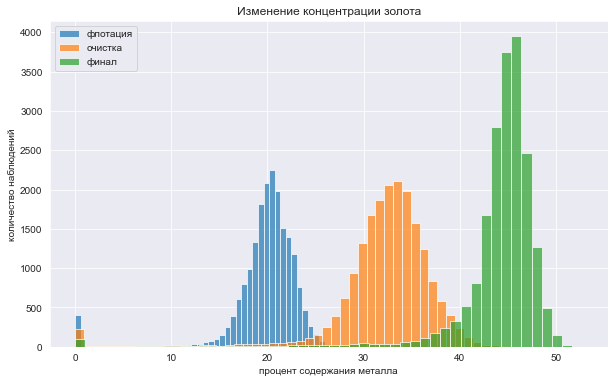

In [15]:
sns.set_style('darkgrid')

plt.figure(figsize=(10, 6))
full_df['rougher.output.concentrate_au'].hist(bins=50, label='флотация', alpha=0.7)
full_df['primary_cleaner.output.concentrate_au'].hist(bins=50, label='очистка', alpha=0.7)
full_df['final.output.concentrate_au'].hist(bins=50, label='финал', alpha=0.7)
plt.legend()
plt.title('Изменение концентрации золота')
plt.xlabel('процент содержания металла')
plt.ylabel('количество наблюдений')
plt.show()

Из графика видим, что концентрация золота улучшается на каждом этапе. Это говорит о хорошем качестве обработки на каждом этапе.

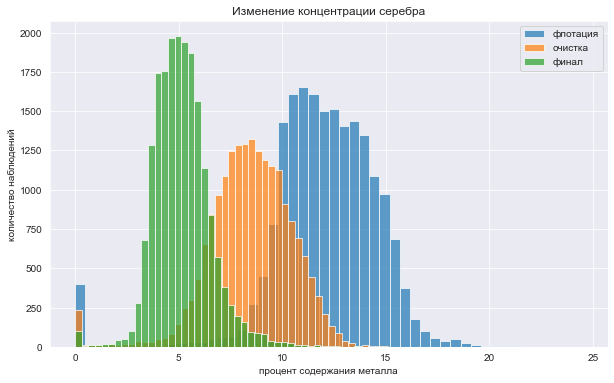

In [16]:
plt.figure(figsize=(10,6))
full_df['rougher.output.concentrate_ag'].hist(bins=50, label='флотация', alpha=0.7)
full_df['primary_cleaner.output.concentrate_ag'].hist(bins=50, label='очистка', alpha=0.7)
full_df['final.output.concentrate_ag'].hist(bins=50, label='финал', alpha=0.7)
plt.title('Изменение концентрации серебра')
plt.xlabel('процент содержания металла')
plt.ylabel('количество наблюдений')
plt.legend()
plt.show()

С серебром все наоборот. На каждом последующем этапе очистки концентрация серебра понижается. Здесь явно стоит сделать вывод, что процесс аффинажа серебра нужно улучшать.

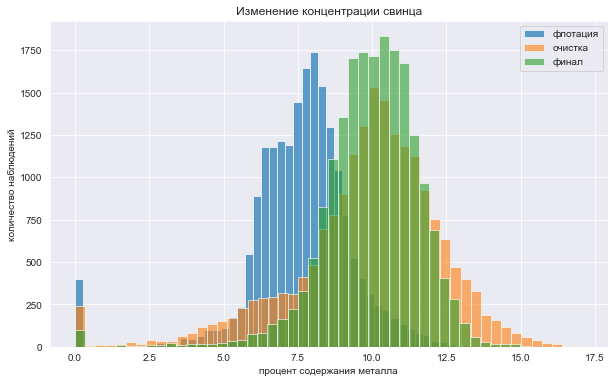

In [17]:
plt.figure(figsize=(10,6))
full_df['rougher.output.concentrate_pb'].hist(bins=50, label='флотация', alpha=0.7)
full_df['primary_cleaner.output.concentrate_pb'].hist(bins=50, label='очистка', alpha=0.6)
full_df['final.output.concentrate_pb'].hist(bins=50, label='финал', alpha=0.6)
plt.title('Изменение концентрации свинца')
plt.xlabel('процент содержания металла')
plt.ylabel('количество наблюдений')
plt.legend()
plt.show()

Из графика по свинцу замечаем, что концентрация металла на этапе очистки и в финальном продукте приблизительно одинаковая, распределения сильно похожи. Подобное помогает нам сделать вывод, что в промежутке между очисткой и финальным продуктом есть недочеты, которые нужно исправить.

Также на кажом графике мы заметили большие пики в нуле. Это явно выбросы, от которых стоит избавиться. Удалять будем из обучающей и тествой выборок.

In [18]:
columns_to_clean = ['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au',
                    'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag',
                    'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']

def drop_zeros(df_to_clean, full_df, col_to_clean):
    '''
    Функия принимает выборку из которой удаляет строки, по заданному логическому условию по полному датафрейму.
    '''
    for col in col_to_clean:
        #сначала выявляем все индексы полного датафрейма, соответствующие условию
        indexes_to_drop_all = full_df.loc[full_df[col] == 0].index
        #выбираем индексы для выборки
        indexes_to_drop = [idx for idx in indexes_to_drop_all if idx in df_to_clean.index]
        #уничтожаем строки
        df_to_clean = df_to_clean.drop(indexes_to_drop)
    return df_to_clean

train_df = drop_zeros(train_df, full_df, columns_to_clean)
test_df = drop_zeros(test_df, full_df, columns_to_clean)

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

Если распределения сильно отличаются друг от друга, оценка модели будет неправильной. Поэтому проверим распределения выборок. Используем гистограмму в относительных значениях для объективной оценки.

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


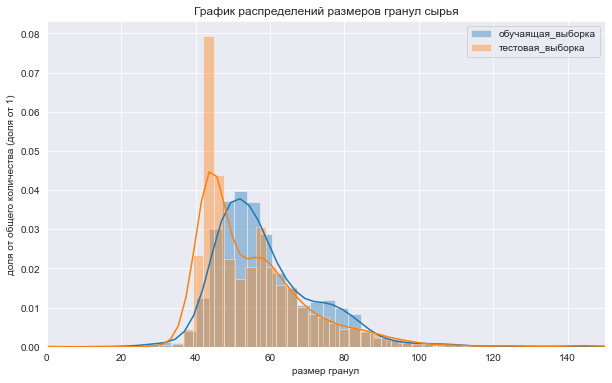

In [19]:
plt.figure(figsize=(10,6))
sns.distplot(train_df['rougher.input.feed_size'].dropna(), bins=140, label='обучаящая_выборка')
sns.distplot(test_df['rougher.input.feed_size'].dropna(), bins=140, label='тестовая_выборка')
plt.xlim(0, 150)
plt.title('График распределений размеров гранул сырья')
plt.xlabel('размер гранул')
plt.ylabel('доля от общего количества (доля от 1)')
plt.legend()
plt.show()

Хватит и визуалной оценки для того чтобы понять, что распределения сильно похожи. Даже пики у них находятся приблизительно в одном месте. Подобный результат говорит нам, о правильном разделении обучающей и тестовой выборок.

<div class="alert alert-block alert-success">
<b>Успех:</b> Радует, что ты перешел к доле в данном случае.
</div>

### Исследование суммарной концентрации всех веществ на разных стадиях

Разделим данные по стадиям и построим график, чтобы рассмотреть распределния.

In [20]:
#исходное сырье
raw = full_df['rougher.input.feed_au'] + full_df['rougher.input.feed_ag'] + full_df['rougher.input.feed_pb']
#черновой конценрат
rough = (full_df['rougher.output.concentrate_au'] + full_df['rougher.output.concentrate_ag']
                                                  + full_df['rougher.output.concentrate_pb'])
#финальный концентрат
final = full_df['final.output.concentrate_au'] + full_df['final.output.concentrate_ag'] + full_df['final.output.concentrate_pb']

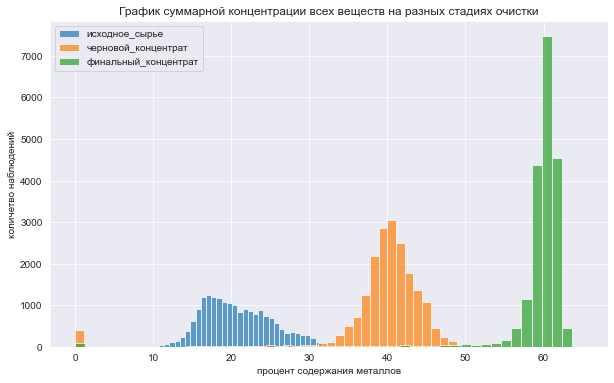

In [21]:
plt.figure(figsize=(10,6))
raw.hist(bins=50, label='исходное_сырье', alpha=0.7)
rough.hist(bins=50, label='черновой_концентрат', alpha=0.7)
final.hist(bins=50, label='финальный_концентрат', alpha=0.7)
plt.title('График суммарной концентрации всех веществ на разных стадиях очистки')
plt.xlabel('процент содержания металлов')
plt.ylabel('количетво наблюдений')
plt.legend()
plt.show()

Вцелом все как и должно быть. На каждой последующей стадии аффинажного процесса концентрация полезных ископаемых увеличивается. Также можем наблюдать как вместе с увеличением концентрации уменьшается разброс значений. Это говорит о хороших и отлаженных процессах обработки, которые нацеленны на конкретный резульат.

Также наблюдаем аномальные значения в нуле. Это точно такие же выбросы как и в пункте 2.1, удалим их.

In [22]:
#так как в черновом и финальном концентратах мы уже очистили данные в пункте 2.1, то удалять нули будем только в исходном сырье
columns_to_clean_2 = ['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb']

train_df = drop_zeros(train_df, full_df, columns_to_clean_2)
test_df = drop_zeros(test_df, full_df, columns_to_clean_2)

## Модель

### Функция для вычисления sMAPE

В процессе производства используется своя метрика качетсва. Напишем функцию для нее. Помимо этого, мы будем оценивать через кросс-валлидацию. Для этой цели обернем функцию в свой скорер.

In [23]:
def smape(y_target, y_pred):
    return ((1/len(y_target)) * np.sum(2 * np.abs(y_target - y_pred) / (np.abs(y_target) + np.abs(y_pred)))) * 100 

smape_metric = make_scorer(smape, greater_is_better = False)

### Подготовка выборок для моделей

Задача заключается в том, что нужно спрогнозировать сразу две величины:
- эффективность обогащения чернового концентрата **rougher.output.recovery**
- эффективность обогащения финального концентрата **final.output.recovery**

Поэтому построим две независимые модели, которые будут предсказывать каждую метрику отдельно.

Так как эффективность обогащения чернового концентрата высчитывается сразу после флотации, то отберем для первой модели только соответствующие признаки(до этой стадии) и сформируем значения целевого признака из полного датафрейма.

Для предсказания эффективности обогащения финального концентрата будем использовать все признаки, так как это результат всего цикал производства. Для него лишь нужно сформировать значения целевого признака.

In [24]:
m1_columns = []
#сначала отберем все признаки процесса rougher
for col in train_df.columns:
    if 'rougher' in col:
        m1_columns.append(col)

#формируем обучающие признаки первой модели
m1_train_features = train_df[m1_columns]
#формируем обучающий целевой признак первой модели
m1_train_target = full_df.loc[m1_train_features.index, 'rougher.output.recovery']

#тестовые признаки для первой модели
m1_test_features = test_df[m1_columns]
#тестовый целевой признак первой модели
m1_test_target = full_df.loc[m1_test_features.index, 'rougher.output.recovery']


#теперь сформируем признаки и таргеты для второй модели
m2_train_features = train_df
m2_train_target = full_df.loc[m2_train_features.index, 'final.output.recovery']

m2_test_features = test_df
m2_test_target = full_df.loc[m2_test_features.index, 'final.output.recovery']

Так как мы создавали таргеты из full_df, то там могли образоваться пропуски. Заполнить их чем-либо кажется плохой идеей, поэтому удалим пропуски в таргетах и соответствующие строки в признаках.

In [25]:
def delete_na(features, target):
    target.dropna(inplace=True)
    features = features.loc[target.index, :]
    return features, target
    
m1_train_features, m1_train_target = delete_na(m1_train_features, m1_train_target)
m1_test_features, m1_test_target = delete_na(m1_test_features, m1_test_target)

m2_train_features, m2_train_target = delete_na(m2_train_features, m2_train_target)
m2_test_features, m2_test_target = delete_na(m2_test_features, m2_test_target)

### Модель предсказания эффективности обогащения чернового концентрата

Будем пробовать три алгоритма машинного обучения: линейную регрессию, решающее дерево и случайный лес. Оценивать будем кросс-валидацией с нашей метрикой качества *sMAPE*.

**Линейная регрессия**

In [26]:
%%time
lr_model = LinearRegression()
lr_model.fit(m1_train_features, m1_train_target)
res_score = cross_val_score(lr_model, m1_train_features, m1_train_target, cv=10, scoring=smape_metric)  
print('sMAPE =', abs(res_score.mean()))

sMAPE = 6.100072199173261
Wall time: 200 ms


**Решающее дерево**

Для древовыидных моделей осущиствим перебор гиперпараметров для нахождения лучшей модели.

In [27]:
%%time
best_score = 1000
for depth in range(2, 15):
    tree_model = DecisionTreeRegressor(random_state=5, max_depth=depth)
    tree_model.fit(m1_train_features, m1_train_target)
    res_score = abs(cross_val_score(tree_model, m1_train_features, m1_train_target, cv=5, scoring=smape_metric).mean())
    if res_score < best_score:
        best_score = res_score
        best_depth = depth
print('sMAPE =', best_score, 'глубина =', best_depth)

sMAPE = 7.129739220345256 глубина = 3
Wall time: 11.6 s


**Случайный лес**

In [28]:
%%time
#для леса реализовал прогрессбар, чтобы видеть когда закончит считать
from tqdm.auto import tqdm
est_range = range(2, 63, 5)
depth_range = range(1, 15)
progress = len(est_range) * len(depth_range)      
pbar = tqdm(total = progress)
    
best_score = 1000
for estim in range(2, 63, 5):
    for depth in range(1, 15):
        forest_model = RandomForestRegressor(n_estimators=estim, max_depth=depth, random_state=5, n_jobs=-1)
        res_score = abs(cross_val_score(forest_model, m1_train_features, m1_train_target, cv=5, scoring=smape_metric).mean())
        if res_score < best_score:
            best_score = res_score
            best_depth = depth
            best_estim = estim
        pbar.update(1)
pbar.close()
print('sMAPE =', best_score, ', глубина =', best_depth, ', количество деревьев =', best_estim)


sMAPE = 6.626285264845516 , глубина = 4 , количество деревьев = 52
Wall time: 9min 15s


Из трех алгоритмов лучше всего себя показала **линейная регрессия**. Опробуем ее на тестовых данных.

In [29]:
m1_predictions = lr_model.predict(m1_test_features)
m1_smape = smape(m1_test_target, m1_predictions)
m1_smape

4.548668527590006

Отлично, на тестовых данных результат еще лучше.

### Модель предсказания эффективности обогащения финального концентрата

**Линейная регрессия**

In [30]:
lr_model = LinearRegression()
lr_model.fit(m2_train_features, m2_train_target)
res_score = cross_val_score(lr_model, m2_train_features, m2_train_target, cv=10, scoring=smape_metric)  
print('sMAPE =', abs(res_score.mean()))

sMAPE = 10.377955688596403


**Решающее дерево**

In [31]:
best_score = 100000000
for depth in range(2, 15):
    tree_model = DecisionTreeRegressor(random_state=5, max_depth=depth)
    tree_model.fit(m2_train_features, m2_train_target)
    res_score = abs(cross_val_score(tree_model, m2_train_features, m2_train_target, cv=5, scoring=smape_metric).mean())
    if res_score < best_score:
        best_score = res_score
        best_depth = depth
print('sMAPE =', best_score, 'глубина =', best_depth)

sMAPE = 9.40592785194795 глубина = 3


**Случайный лес**

In [32]:
%%time

est_range = range(2, 63, 5)
depth_range = range(1, 15)
progress = len(est_range) * len(depth_range)      
pbar = tqdm(total = progress)

best_score = 100000000
for estim in range(2, 63, 5):
    for depth in range(1, 15):
        forest_model = RandomForestRegressor(n_estimators=estim, max_depth=depth, random_state=5, n_jobs=-1)
        res_score = abs(cross_val_score(forest_model, m2_train_features, m2_train_target, cv=5, scoring=smape_metric).mean())
        if res_score < best_score:
            best_score = res_score
            best_depth = depth
            best_estim = estim
        pbar.update(1)
pbar.close()
print('sMAPE =', best_score, ', глубина =', best_depth, ', количество деревьев =', best_estim)


sMAPE = 9.025787322017313 , глубина = 4 , количество деревьев = 17
Wall time: 23min 27s


Здесь лучшего результата добилась модель **случайного леса** с гиперпараметрами: глубина = 4 , количество деревьев = 17. Также проверим на тестовых данных.

In [35]:
m2_model = RandomForestRegressor(n_estimators=17, max_depth=4)
m2_model.fit(m2_train_features, m2_train_target)
m2_predictions = m2_model.predict(m2_test_features)

m2_smape = smape(m2_test_target, m2_predictions)
m2_smape

8.186951203389006

И здесь результат оказался лучше.

### Подсчет итогового sMAPE

Для подсчета нам предастваленна специальная формула:

Итоговое sMAPE = 25% * sMAPE(rougher) + 75% * sMAPE(final)

In [36]:
m1_smape * 0.25 + m2_smape * 0.75

7.2773805344392555

## Общий вывод:

Входные данные представляли собой 3 таблицы данных, в которых каждая строка была наблюдение по одной массе руды.

В данных встретились отсутствующие значения и выбросы. Данные были преобработаны и подготовлены для обучения на трех алгоритмах машинного обучения: решающее дерево, случаный лес и логиситческая регрессия.

Из-за наличия двух целевых признаков было принято решение разбить задачу на построение двух моделей.

Для предсказания эффективности обогащения чернового концентрата рекомендуется использовать модель **линейной регрессии**.
Для предсказания ффективности обогащения финального концентрата рекомендуется использовать модель **случайного леса с гиперпараметрами: глубина = 6 , количество деревьев = 17.**